<a href="https://colab.research.google.com/github/jhonyhenrick/jhonyhenrick/blob/main/PROJETO_2_Classifica%C3%A7%C3%A3o_Multiclasse_e_Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJETO 2 - Inteligência Artificial -  “Iris Flower Dataset”.**

**Alunos**:

*   Gabriel Blanco de Andrade - GU3013359
*   Humberto Miliszewski - GU3012468
*   João Henrique Gonçalves Barbosa - GU3011275
*   João Lucas Rosa - GU3013618

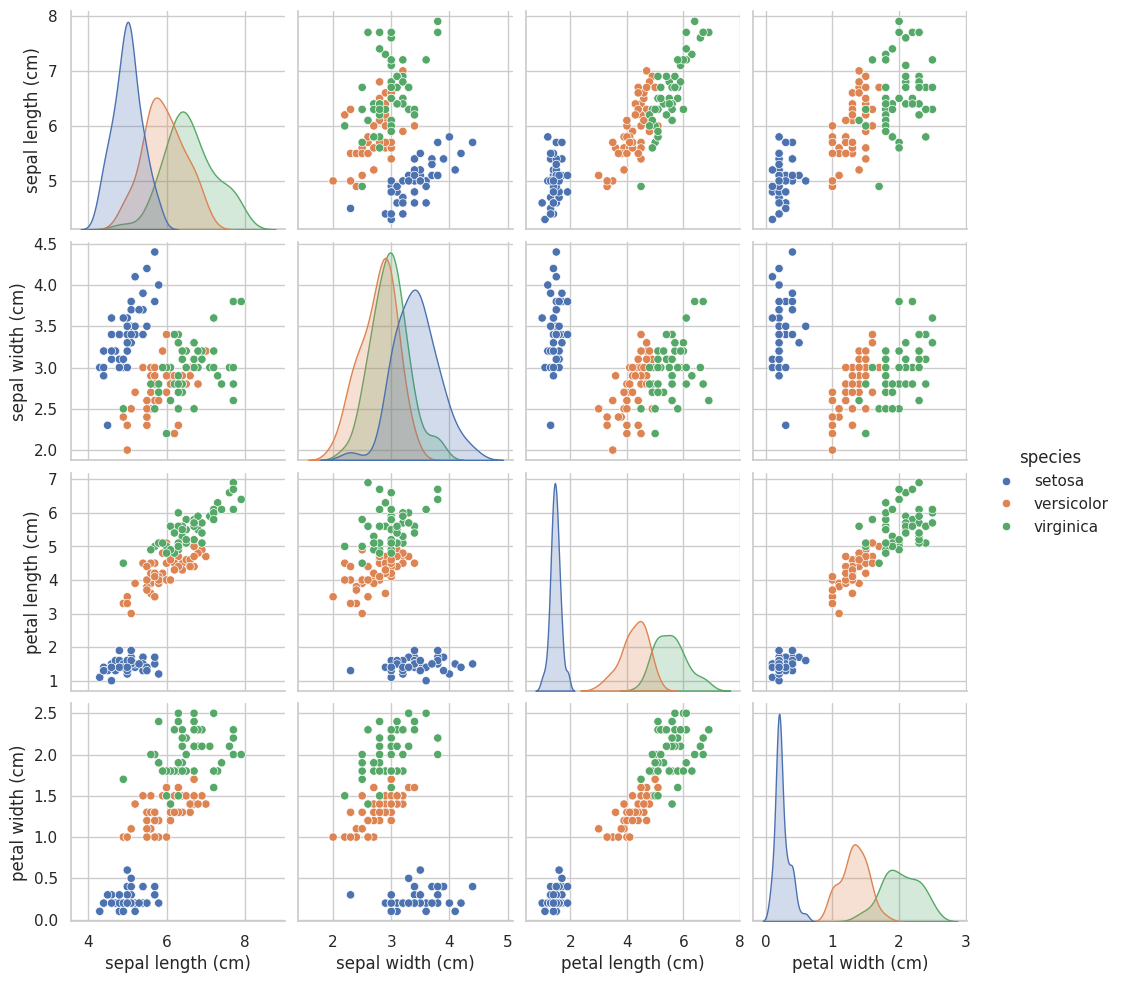

In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Carregar dados
iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Visualização dos dados
sns.pairplot(df_iris, hue='species')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

None


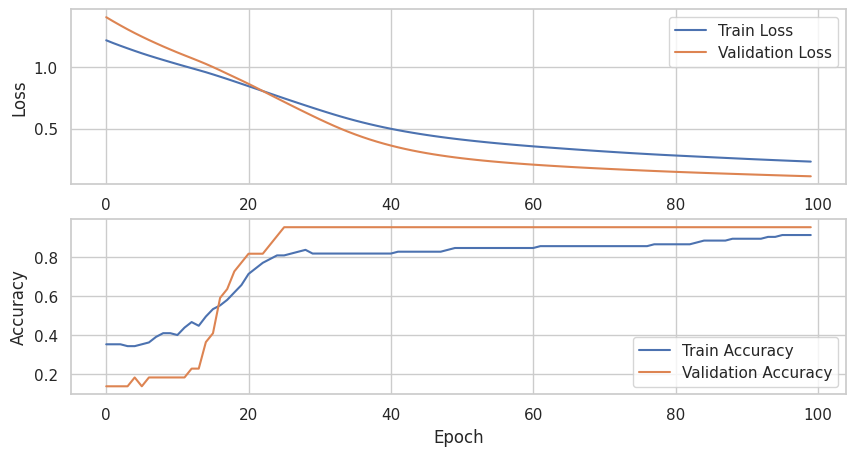

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8261 - loss: 0.3120
Test Loss: 0.3120
Test Accuracy: 0.8261
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8261 - loss: 0.3120
Accuracy: 82.61%


In [21]:


# Definir a seed para garantir a reprodutibilidade dos resultados
np.random.seed(42)
tf.random.set_seed(42)

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Converter y para formato one-hot
y = tf.keras.utils.to_categorical(y, 3)

# Dividir o dataset em 70% treino, 15% validação e 15% teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
# Definir a rede neural com modelo "keras"
input_dim = X_train.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_dim,)),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Usar softmax para classificação multiclasse
])

# Compilar a rede neural
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Treinar a rede neural com o dataset
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=100, verbose=0, callbacks=[early_stopping])

# Mostrar o loss e a acurácia durante o treinamento
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Fazer previsões com a rede treinada
y_pred = model.predict(X_test)

# Calcula a acurácia no conjunto de teste
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f%%' % (accuracy * 100))


Índice de Silhueta: 0.480


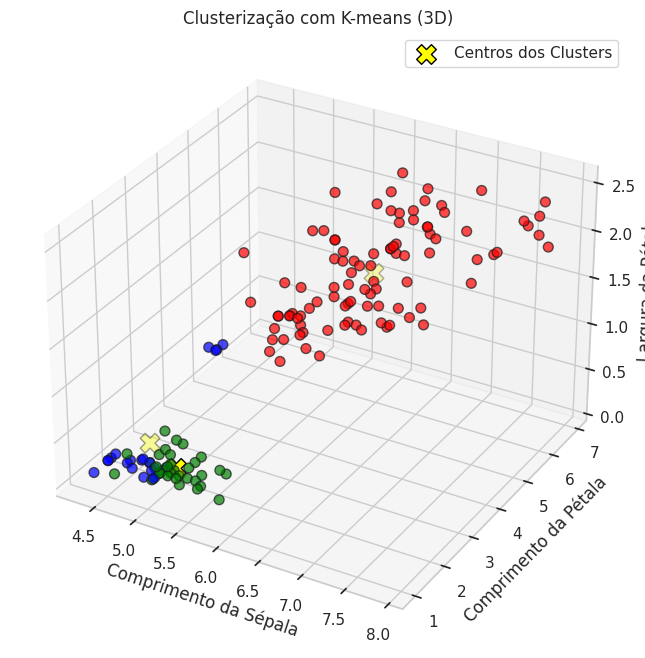

In [29]:

# Carregar o dataset Iris
X = iris.data

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar o K-means para clusterizar os dados em 3 grupos
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

# Centros dos clusters
centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Desnormalizar os centros para as escalas originais

# Calcular o índice de silhueta
silhouette = silhouette_score(X_scaled, clusters)
print(f'Índice de Silhueta: {silhouette:.3f}')

# Visualização dos clusters em 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
colors = np.array(['red', 'green', 'blue'])

# Plotar os pontos
ax.scatter(X[:, 0], X[:, 2], X[:, 3], c=colors[clusters], s=50, edgecolors='k', alpha=0.7)

# Plotar os centros dos clusters como 'X'
ax.scatter(centers[:, 0], centers[:, 2], centers[:, 3], s=200, c='yellow', marker='X', edgecolors='black', label='Centros dos Clusters')

ax.set_title('Clusterização com K-means (3D)')
ax.set_xlabel('Comprimento da Sépala')
ax.set_ylabel('Comprimento da Pétala')
ax.set_zlabel('Largura da Pétala')

ax.legend()

# Mostrar o gráfico
plt.show()